In [1]:
from bs4  import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [2]:

source=requests.get('https://www.imdb.com/india/top-rated-indian-movies/')
source.raise_for_status() 
soup=BeautifulSoup(source.text,'html.parser') #default parser 
#print(soup)


In [3]:
movies=soup.find('tbody',class_="lister-list").find_all('tr') #returns the list
#print(movies)

In [4]:
name_list=list()
rank_list=list()
year_list=list()
rating_list=list()
for movie in movies:    #fetching individual movies
  name=movie.find('td',class_="titleColumn").a.text
  name_list.append(name)
  rank=movie.find('td',class_="titleColumn").get_text(strip=True).split('.')[0]
  rank_list.append(rank)
  year=movie.find('td',class_="titleColumn").span.text.strip('()')
  year_list.append(year)
  rating=movie.find('td', class_='ratingColumn imdbRating').strong.text
  rating_list.append(rating)
  print(rank, name, year, rating)

1 Rocketry: The Nambi Effect 2022 8.5
2 Anbe Sivam 2003 8.4
3 Golmaal 1979 8.4
4 Nayakan 1987 8.4
5 Jai Bhim 2021 8.4
6 Pariyerum Perumal 2018 8.4
7 3 Idiots 2009 8.4
8 Apur Sansar 1959 8.3
9 777 Charlie 2022 8.3
10 Manichitrathazhu 1993 8.3
11 Kumbalangi Nights 2019 8.3
12 Black Friday 2004 8.3
13 C/o Kancharapalem 2018 8.3
14 Soorarai Pottru 2020 8.3
15 #Home 2021 8.3
16 Taare Zameen Par 2007 8.3
17 Kireedam 1989 8.3
18 Dangal 2016 8.3
19 Kaithi 2019 8.3
20 Jersey 2019 8.3
21 96 2018 8.2
22 Asuran 2019 8.2
23 Thevar Magan 1992 8.2
24 Visaaranai 2015 8.2
25 Sarpatta Parambarai 2021 8.2
26 Natsamrat 2016 8.2
27 Thalapathi 1991 8.2
28 Pather Panchali 1955 8.2
29 Drishyam 2 2021 8.2
30 Nadodikkattu 1987 8.2
31 Thani Oruvan 2015 8.2
32 Sardar Udham 2021 8.2
33 Vada Chennai 2018 8.2
34 Aparajito 1956 8.2
35 Jaane Bhi Do Yaaro 1983 8.2
36 Khosla Ka Ghosla! 2006 8.2
37 Drishyam 2013 8.2
38 Peranbu 2018 8.1
39 Anniyan 2005 8.1
40 Chupke Chupke 1975 8.1
41 Mahanati 2018 8.1
42 Agent Sai Sriniv

In [5]:
data={"Rank":rank_list,
    "Movie Name":name_list,
    "Year of Release":year_list,
    "IMDB rating":rating_list}

      
df=pd.DataFrame(data)
print(df)

    Rank                  Movie Name Year of Release IMDB rating
0      1  Rocketry: The Nambi Effect            2022         8.5
1      2                  Anbe Sivam            2003         8.4
2      3                     Golmaal            1979         8.4
3      4                     Nayakan            1987         8.4
4      5                    Jai Bhim            2021         8.4
..   ...                         ...             ...         ...
245  246                         Don            1978         7.6
246  247          Ennu Ninte Moideen            2015         7.6
247  248                     Aligarh            2015         7.6
248  249        Velaiilla Pattadhari            2014         7.6
249  250                Colour Photo            2020         7.6

[250 rows x 4 columns]


In [6]:
df['Number of Movies']=''
pivot=df.pivot_table(index="Year of Release",aggfunc="count")

pivot.drop(["IMDB rating","Movie Name","Rank"],axis=1,inplace=True)
pivot

,Number of Movies
Year of Release,
1955,1
1956,1
1957,2
1958,1
1959,1
1960,1
1964,1
1965,1
1968,1


<AxesSubplot:title={'center':'Number of movies per year in top 250'}, xlabel='Year of Release'>

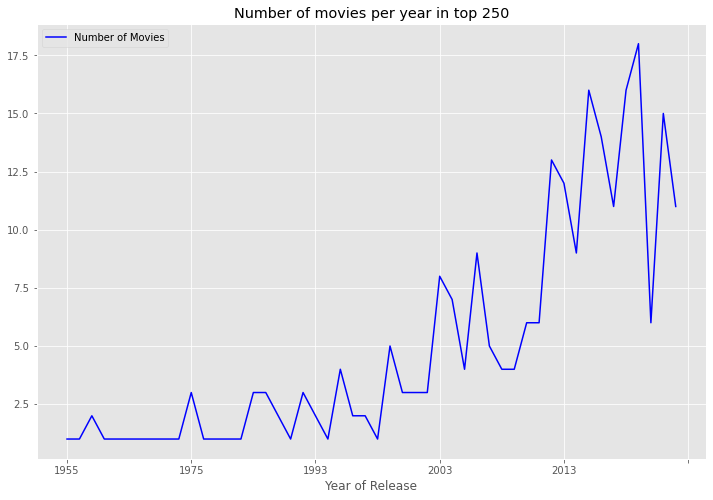

In [7]:
pivot = pivot.astype(int)
pivot.plot.line(title="Number of movies per year in top 250", color="Blue")

In [8]:
#Thus, we can observe that the trend of top movies is more inclined towards recent releases